# Multiple Linear Regression - Ejercicio - Publicidad y Ventas

**Contexto**  
Este conjunto de datos contiene las ventas obtenidas, de acuerdo al monto invertido en publicidad en diferentes canales.

**Contenido**  
El conjunto de datos proviene de kaggle: [Advertising dataset](https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset).  
Contiene 200 renglones, con las siguientes columnas:
* TV: inversión de anuncios por TV, en miles de USD
* Radio: inversión de anuncios en radio, en miles de USD
* Newspaper: inversión de anuncios en periódicos, en miles de USD
* **Sales**: ventas obtenidas en millones de USD **->(variable objetivo)**

**Planteamiento del problema**  
Se busca predecir que canales tienen mayor impacto en las ventas obtenidas.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Cargar Datos

In [2]:
# Importar los datos
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Renombrar columnas
df.columns = ['renglón', 'tv', 'radio', 'periodico', 'ventas']
df.head()

,renglón,tv,radio,periodico,ventas
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Normalización

In [4]:
# Variables independientes
X = df[['tv', 'radio', 'periodico']]
X.head()

,tv,radio,periodico
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
# Normalizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_adj = scaler.fit_transform(X)
print(X_adj)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [6]:
# Variable dependiente
y = df['ventas']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: ventas, dtype: float64

In [7]:
print('X:', len(X_adj), 'y:', len(y))

X: 200 y: 200


## Modelado

In [8]:
# Conjunto de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_adj, y, test_size=0.3, random_state=0)

In [9]:
print('X_train:', len(X_train), 'y_train:', len(y_train))
print('X_test:',  len(X_test),  'y_test:',  len(y_test))

X_train: 140 y_train: 140
X_test: 60 y_test: 60


In [10]:
# Entrenamiento
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [11]:
# Predicciones
prediction = model.predict(X_test)
prediction

array([10.05866652,  7.43318827,  6.95305695, 24.16874598, 11.98172029,
        6.54464708, 13.19426793, 14.90240334, 11.07675294, 16.25061663,
       23.0081158 ,  9.12072148, 10.29342297, 15.3709661 , 11.62396513,
       12.1057432 , 18.55030805, 10.85810888, 16.13879856, 17.20281404,
       24.25469939,  9.43869821, 15.13419408, 12.41283844,  5.66973859,
       15.23876681, 12.1878762 , 20.95164149, 13.22671807,  9.20954724,
       13.39812727, 21.61944517, 18.05938674, 21.14798547,  6.73582996,
        6.16799717,  7.98042607, 13.09083488, 14.86214078,  6.23597127,
       12.35246911,  9.19452235, 15.04717679, 16.23039254, 17.17240889,
       13.3341216 ,  3.68035786, 12.53946851, 15.93674769,  8.67881357,
       10.62459997, 19.5646526 , 18.3472282 , 15.24662975, 10.04846378,
        8.17344188, 21.49061088, 14.137309  , 16.29760212,  8.90502274])

In [12]:
# Resultados
print(model.intercept_)
coef = pd.DataFrame(model.coef_, X.columns, columns=['coeficiente'])
coef

14.053309666438658


,coeficiente
tv,3.760878
radio,2.966070
periodico,0.040052


## Evaluacion

In [13]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.2333759522850203
MSE: 3.6913948456986088
RMSE: 1.9213003007595166


<Axes: xlabel='ventas', ylabel='Density'>

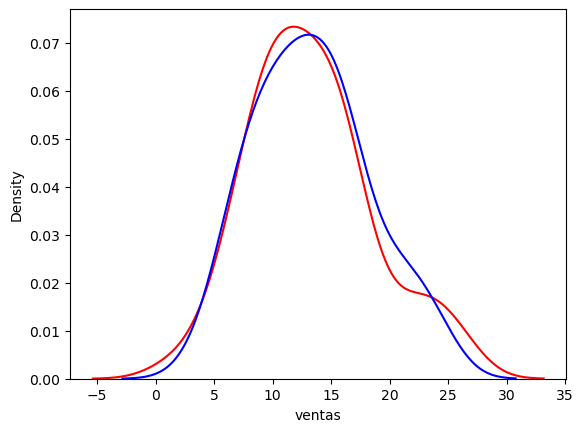

In [14]:
ax1 = sns.kdeplot(y_test, color="r")
sns.kdeplot(prediction, color="b", ax=ax1)